In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

In [4]:
# Load dataset
url = "heart.csv"
df = pd.read_csv(url)

In [5]:
# Data summary
print(df.head())
print(df.isnull().sum())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:
# Split data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision Tree Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       102
           1       0.75      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



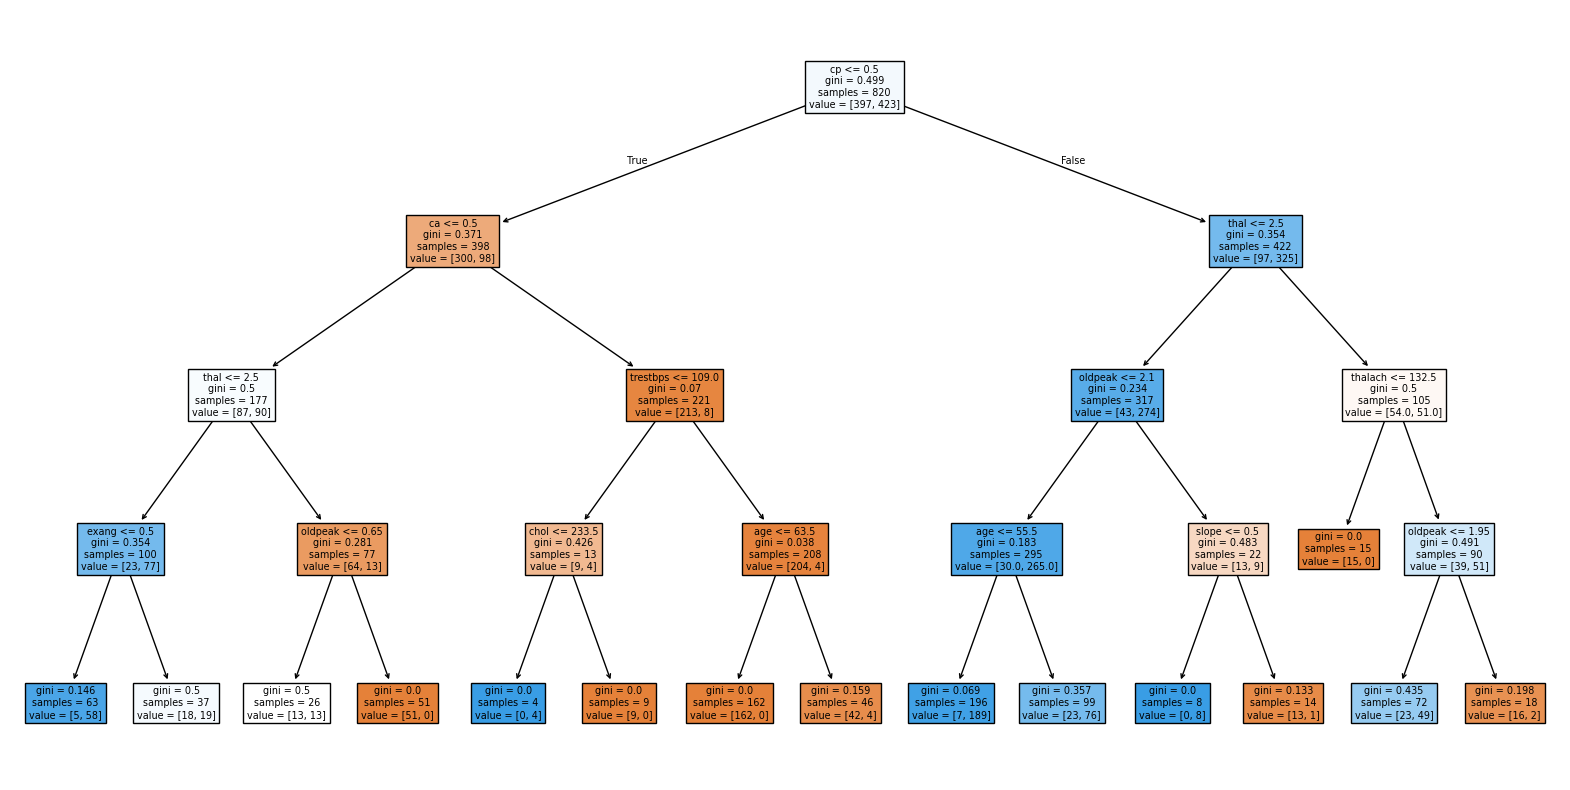

In [8]:
# 1. Train Decision Tree
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# Evaluate
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Plot tree
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns)
plt.savefig('tree_visualization.png')
plt.show()

In [9]:
# 2. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



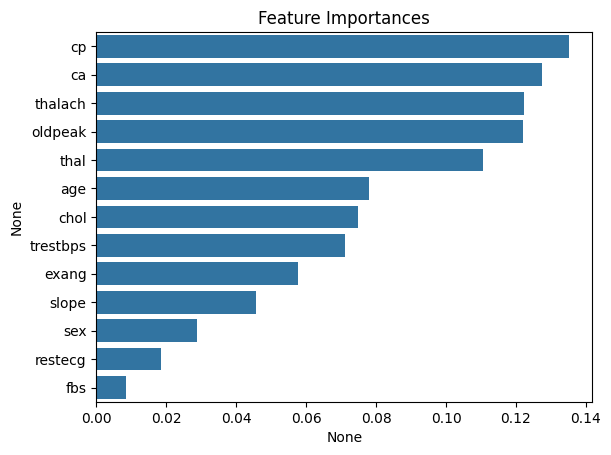

In [10]:
# 3. Feature Importances
importances = rf.feature_importances_
features = pd.Series(importances, index=X.columns).sort_values(ascending=False)

sns.barplot(x=features, y=features.index)
plt.title("Feature Importances")
plt.show()

In [11]:
# 4. Cross-Validation
dt_cv = cross_val_score(dt, X, y, cv=5).mean()
rf_cv = cross_val_score(rf, X, y, cv=5).mean()

print("Decision Tree CV Accuracy:", dt_cv)
print("Random Forest CV Accuracy:", rf_cv)


Decision Tree CV Accuracy: 0.8341463414634147
Random Forest CV Accuracy: 0.9970731707317073
